In [47]:
%load_ext autoreload
%autoreload 2

import pandas as pd

from code.evaluation import (compute_horizon_degradation_metrics,
                             plot_forecast_degradation,
                             plot_selected_horizons,
                             plot_forecast_trajectory,
                             compute_forecast_metrics)

from code.data_utils import clean_actual_data, clean_forecast_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
actual_df = pd.read_csv(r'../data/processed/actual_load.csv', parse_dates=['timestamp'])
forecast_df = pd.read_csv(r'../data/processed/forecast_load.csv', parse_dates=['issued_at', 'target_time'])

In [51]:
actual_df.shape

(8220, 2)

In [52]:
forecast_df.shape

(197280, 4)

In [53]:
forecast_df.shape[0]/actual_df.shape[0]

24.0

In [54]:
df_metrics = compute_horizon_degradation_metrics(actual_df, forecast_df)
df_metrics

,horizon,MAE,MSE,RMSE,MAPE (%),SMAPE (%)
0,0,158.946414,4.563790e+04,213.630289,0.196988,0.196939
1,1,202.459897,7.303449e+04,270.248945,0.253066,0.253000
2,2,334.882818,1.959299e+05,442.639713,0.418837,0.418799
3,3,489.780458,4.135312e+05,643.063924,0.612545,0.612610
4,4,651.024041,7.249899e+05,851.463363,0.813964,0.814191
5,5,814.475266,1.129288e+06,1062.679835,1.017944,1.018382
6,6,978.725463,1.625560e+06,1274.974385,1.222795,1.223485
7,7,1143.520772,2.213543e+06,1487.797884,1.428208,1.429197
8,8,1308.484760,2.892255e+06,1700.663252,1.633747,1.635078
9,9,1473.445650,3.660447e+06,1913.229402,1.839219,1.840933


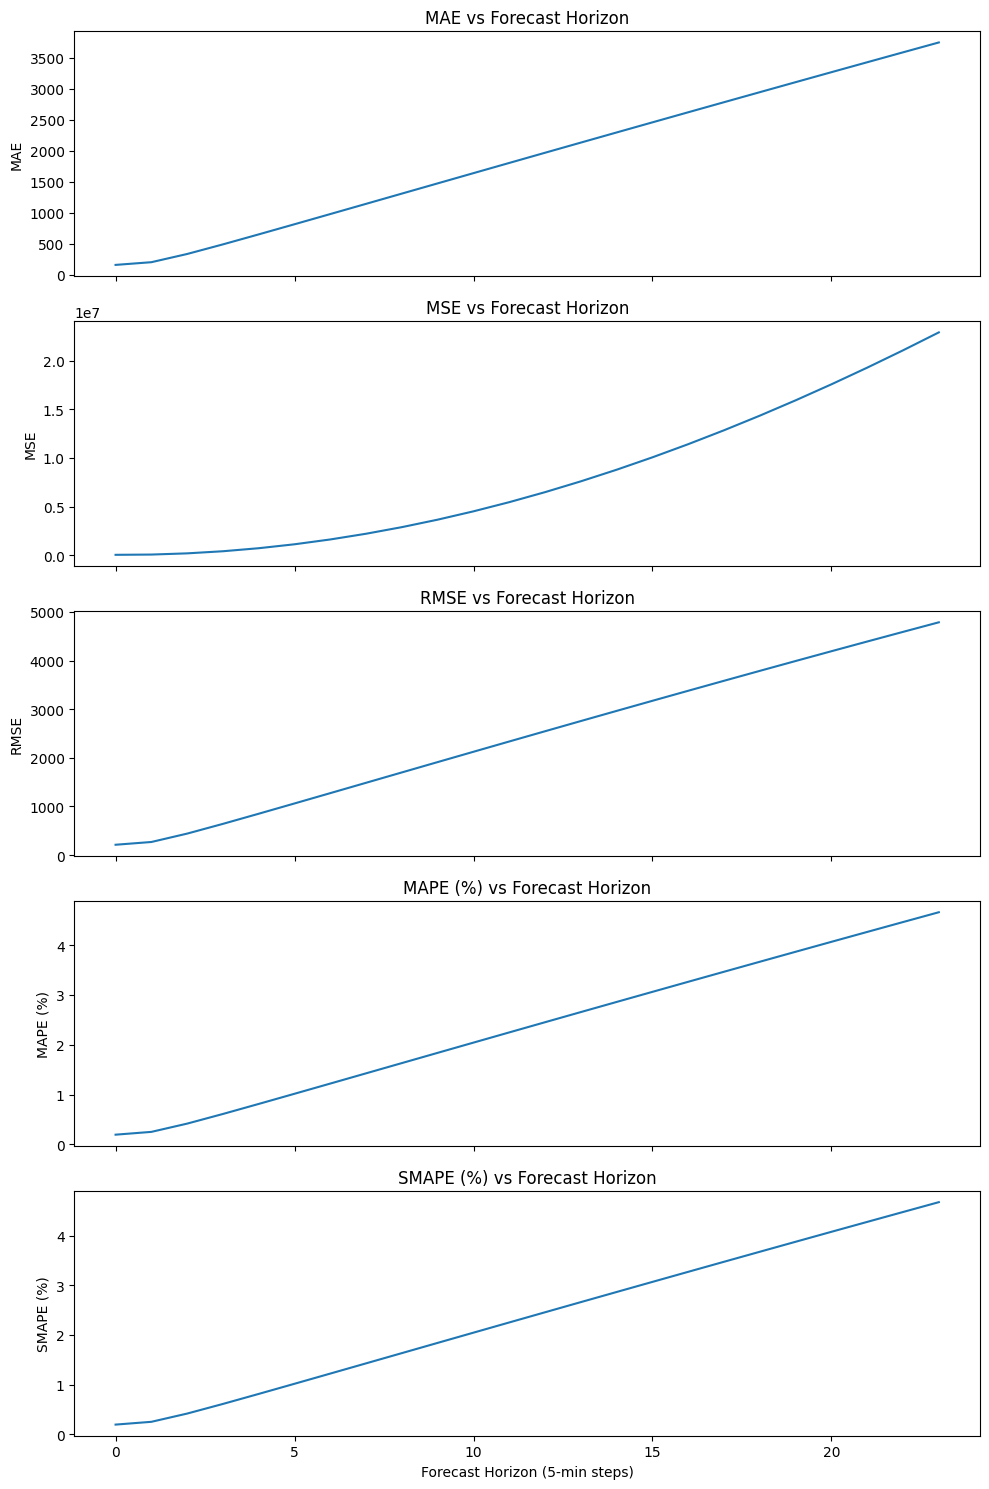

In [55]:
plot_forecast_degradation(df_metrics)

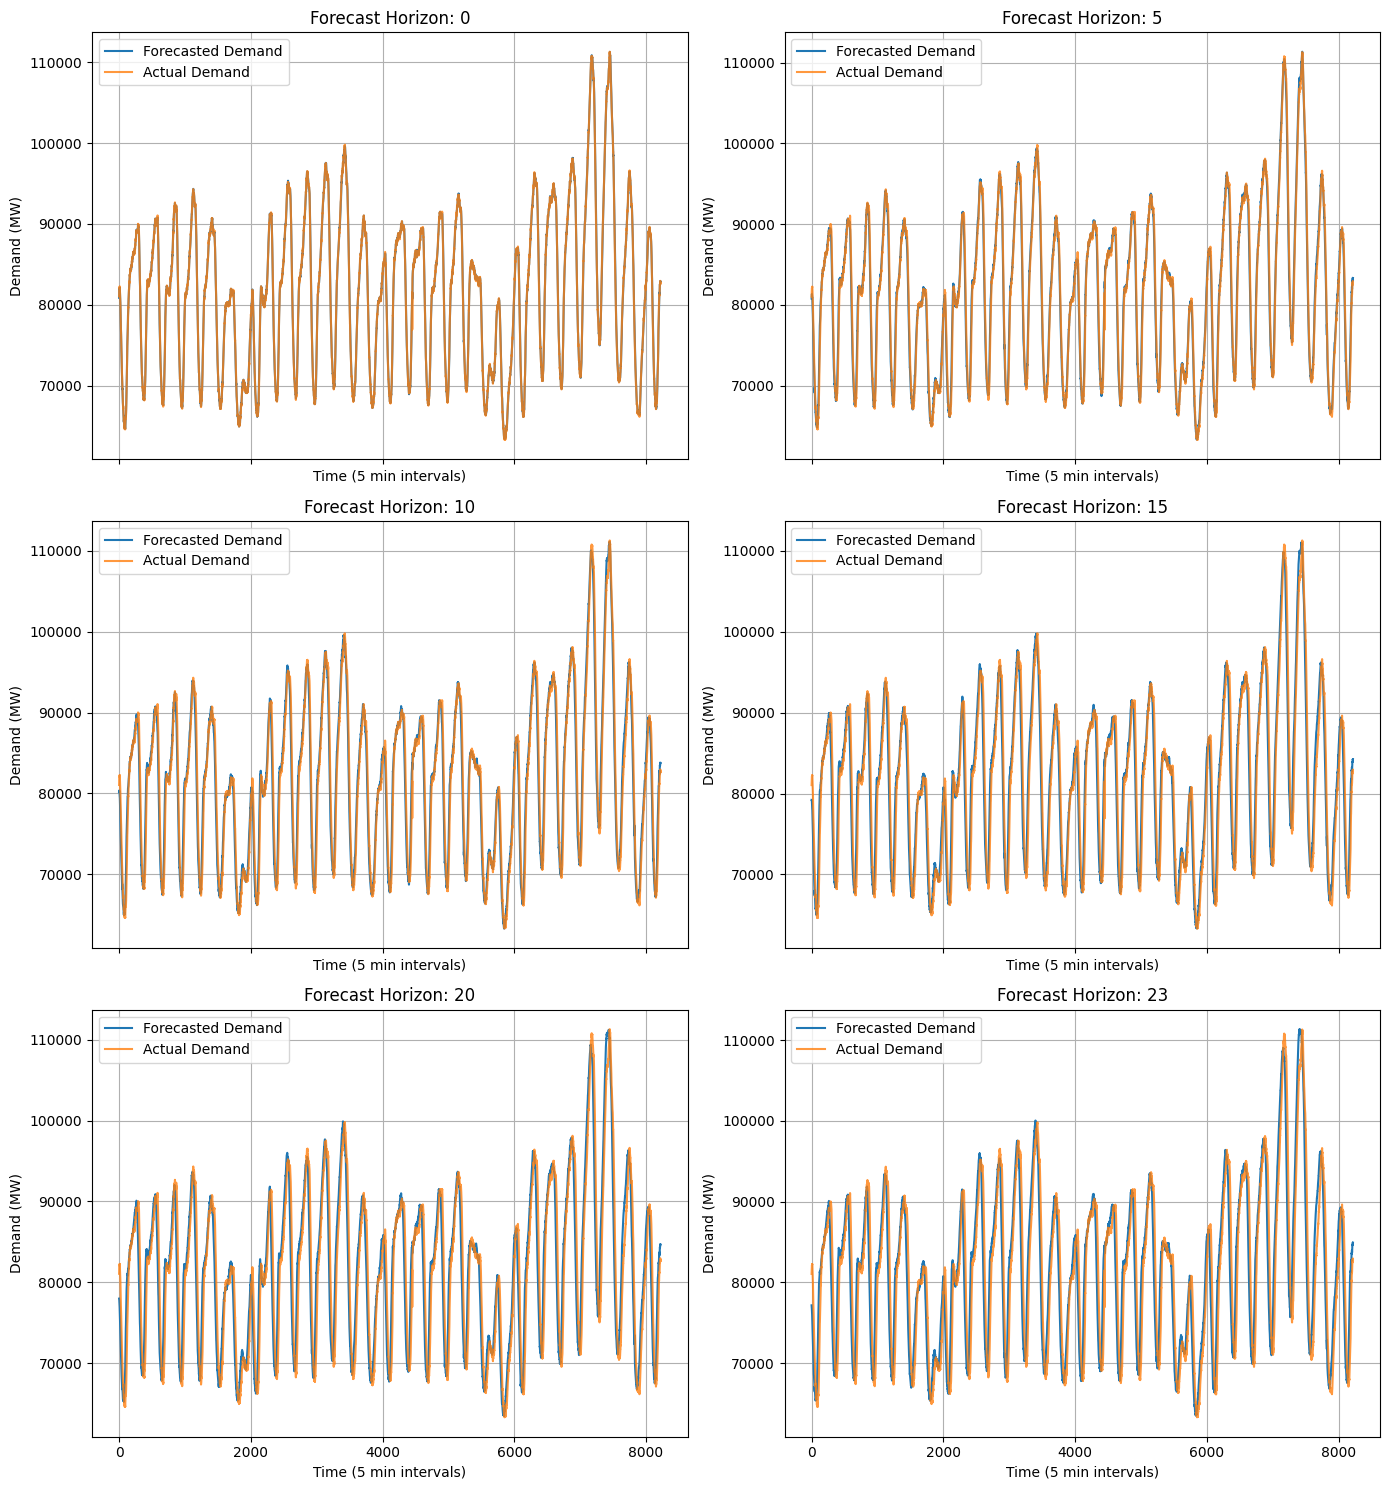

In [56]:
plot_selected_horizons(actual_df, forecast_df)

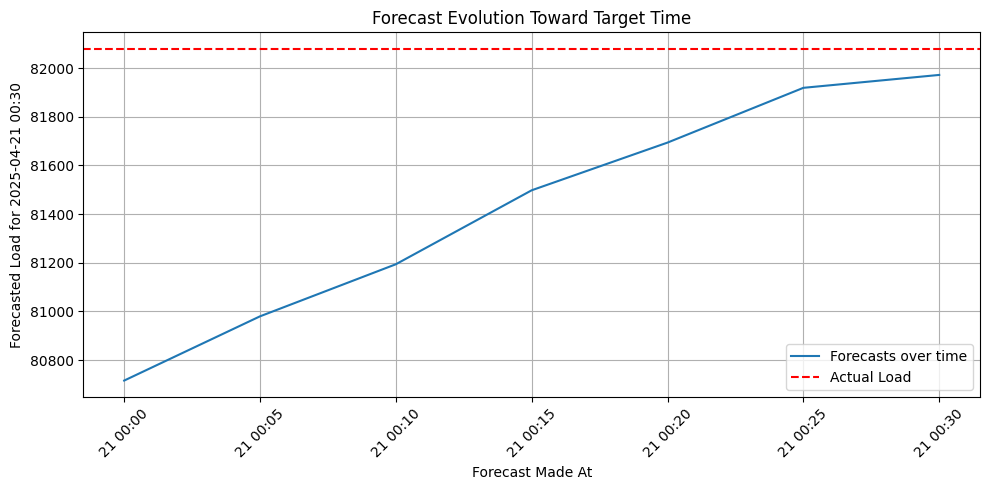

In [60]:
target_time = pd.Timestamp("2025-04-21 00:30:00")
plot_forecast_trajectory(actual_df, forecast_df, target_time)